# Credit EDA Assignment

## Introduction

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers. 

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending(to risky applicants) at a higher interest rate, etc. This will ensire that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. 

In other words, the company wants to understand the driving factors(or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessments.

### Importing Libraries

In [1]:
#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Loading the Dataset

In [3]:
#Reading the Dataset
app_df = pd.read_csv("application_data.csv")

### Inspecting the Dataframe

In [4]:
#Checking the data
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
#Reading the columns
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#Determining the shape 
app_df.shape

(307511, 122)

In [7]:
#Checking the info
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
#Describing the data
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

### Data Cleaning

In [10]:
#Checking Null Values
app_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
#Checking the % of null values in each column
null_data = app_df.isnull().sum() * 100/ len(app_df)

In [12]:
#Checking the % of null values greater than 30%
null_data_columns = null_data[null_data >=30]
null_data_columns

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

In [13]:
#Dropping the columns which have more than 30% missing values
app_df = app_df.drop(columns=null_data_columns.index)

In [14]:
#Checking the shape of the updated dataframe
app_df.shape

(307511, 72)

In [15]:
#Checking the columns which have null values <=20%
missing_values = null_data[null_data <=20].sort_values(ascending=False)
missing_values

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

### Best ways to Impute columns

In [16]:
#Checking for column 'AMT_REQ_CREDIT_BUREAU_YEAR'
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [17]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

As we can see the data in the column is categroical, so imputing the missing values with the mode is the best option. Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, that is '0'. 

In [18]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [19]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [20]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [21]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [22]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [23]:
#Checking for columns 'AMT_GOODS_PRICE'
app_df.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [24]:
app_df.AMT_GOODS_PRICE.median()

450000.0

For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median value i.e. '450000'

In [25]:
#Checking for columns 'AMT_ANNUITY'
app_df.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [26]:
app_df.AMT_ANNUITY.median()

24903.0

For the column 'AMT_ANNUITY', we can impute the missing values with the median value i.e. '24903'

### Errors in the Datatypes

In [27]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

As we can see there are negative values present in the columns 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'. We have to convert them to positive values.

In [28]:
days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
app_df[days_col] = app_df[days_col].abs()

In [29]:
#Converting days to years
app_df[days_col] = (app_df[days_col]/365).astype(int)
app_df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,13.168683,7.713474
std,11.954593,381.972190,9.646841,4.134515
min,20.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,5.000000,4.000000
50%,43.000000,6.000000,12.000000,8.000000
75%,53.000000,15.000000,20.000000,11.000000
max,69.000000,1000.000000,67.000000,19.000000


In [30]:
#Renaming the column names
app_df.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

In [31]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
#Checking Gender Column
app_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [33]:
#Imputing XNA with mode of the gender column i.e. 'F'
app_df.loc[app_df['CODE_GENDER']=='XNA','CODE_GENDER'] = 'F'
app_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Binning the continuous variables

In [34]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_df['AMT_INCOME_RANGE'] = pd.qcut(app_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [35]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
app_df['AMT_CREDIT_RANGE'] = pd.qcut(app_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [36]:
# Binning 'YEARS_BIRTH'
app_df['YEARS_BIRTH_RANGE']=pd.cut(app_df['YEARS_BIRTH'], bins=[19,25,35,60,100], labels=['18+','25+', '35+', '60+'])
app_df['YEARS_BIRTH_RANGE'].value_counts()

35+    185900
25+     75925
60+     29368
18+     16318
Name: YEARS_BIRTH_RANGE, dtype: int64

### Finding Outliers

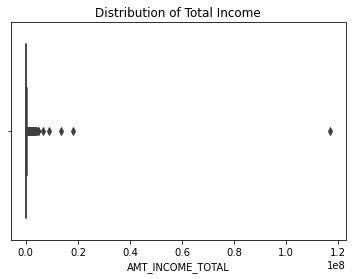

In [37]:
# Lets make box plot on 'AMT_INCOME_TOTAL' column
sns.boxplot(app_df['AMT_INCOME_TOTAL'])
plt.title('Distribution of Total Income')
plt.show()

This column gives us the information about the income of the client. We observe a value 1.17M which is an outlier.

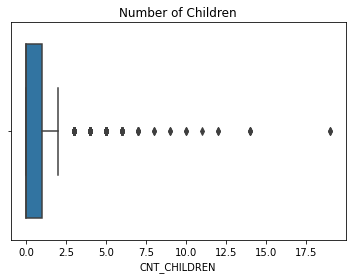

In [38]:
#lets make box plot on 'CNT_CHILDREN' column
sns.boxplot(app_df['CNT_CHILDREN'])
plt.title('Number of Children')
plt.show()

This column gives us the information about the number of children the client has. We observe a value 19 which is an outlier.

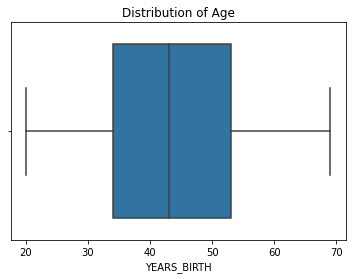

In [39]:
#Lets make box plot on 'YEARS_BIRTH' column
sns.boxplot(app_df['YEARS_BIRTH'])
plt.title('Distribution of Age')
plt.show()

This column gives us the information about the Distribution of Age of the client. We observe that there is no outlier.

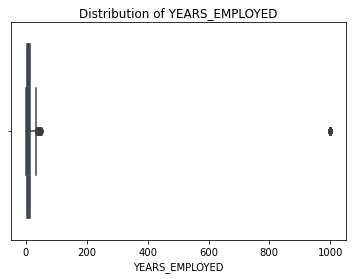

In [40]:
#Lets make box plot on 'YEARS_EMPLOYED' column
sns.boxplot(app_df['YEARS_EMPLOYED'])
plt.title('Distribution of YEARS_EMPLOYED')
plt.show()

This column gives us the information about the number of years the client has been employed. We observe that the value 1000 is an outlier.

### Checking Imbalance

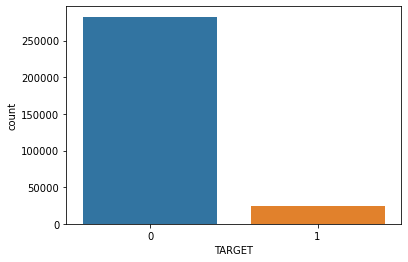

In [41]:
sns.countplot(app_df['TARGET'])
plt.show()

In [42]:
app_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [43]:
app_df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [44]:
# Dividing the original dataset into two different datasets depending upon the target value
target1 = app_df[app_df['TARGET']==1]
target0 = app_df[app_df['TARGET']==0]

In [45]:
#Lets check the ratio of imbalance of two data frames
ratio = target0.shape[0]/target1.shape[0]
ratio

11.387150050352467

As we see the ratio above, we can conclude that there are around 11 0's for every 1 present in the dataframe. 

### Univariate Analysis

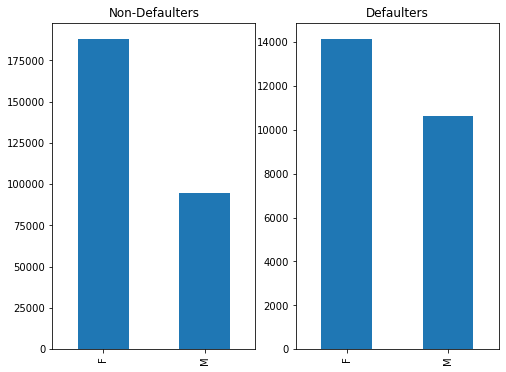

In [106]:
#univariate analysis for 'CODE_GENDER'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
target0['CODE_GENDER'].value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title('Defaulters')
target1['CODE_GENDER'].value_counts().plot.bar()
plt.show()

We can infer that Females are the majority in both the cases.

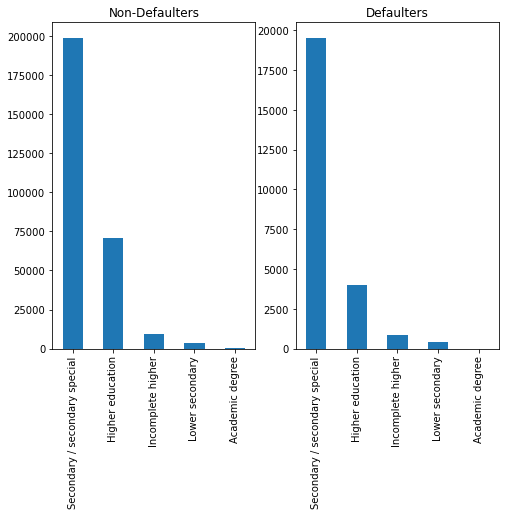

In [105]:
#univariate analysis for 'NAME_EDUCATION_TYPE'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
target0['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.xticks(rotation=90)
target1['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.show()

We can infer that Secondary/secondary special category are the majority in both the cases

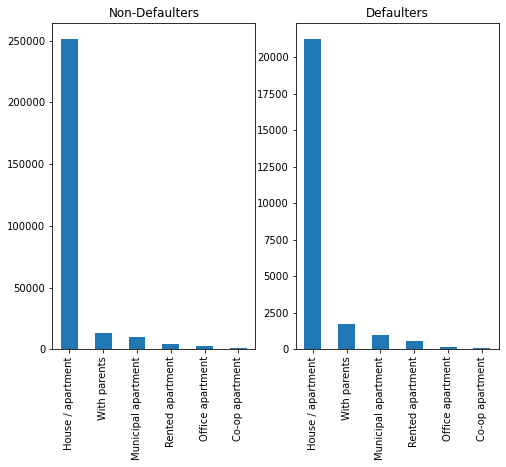

In [104]:
#univariate analysis for 'NAME_HOUSING_TYPE'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
target0['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
target1['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.show()

We can infer that House/Apartment category are the majority in both the cases

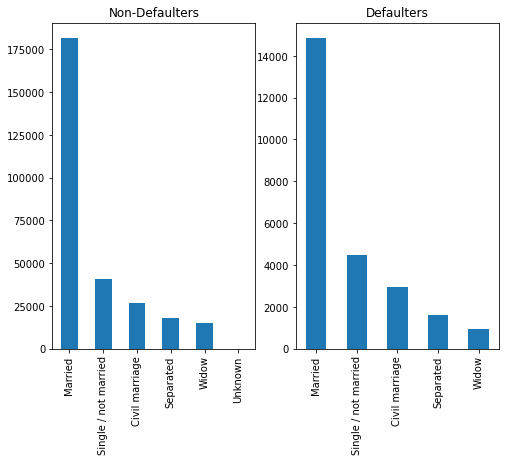

In [103]:
#univariate analysis for 'NAME_FAMILY_STATUS'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
target0['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
target1['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.show()

We can infer that the Married category is the majority in both the cases

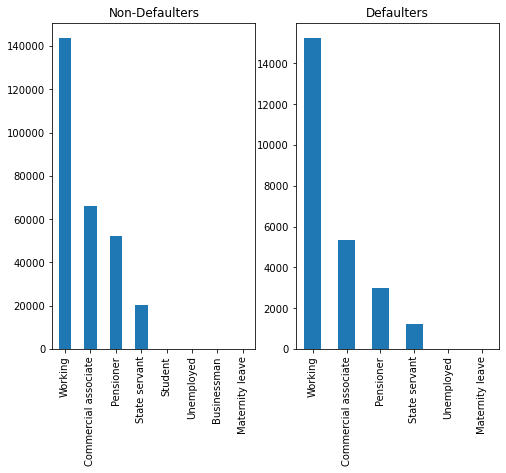

In [102]:
#Univariate Analysis on NAME_INCOME_TYPE
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
target0['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
target1['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.show()

We can infer that Working category are the majority in both the cases

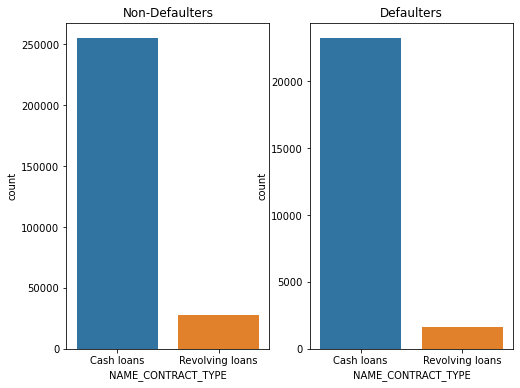

In [101]:
#Univariate Analysis on NAME_CONTRACT_TYPE
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(target0['NAME_CONTRACT_TYPE'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target1['NAME_CONTRACT_TYPE'])
plt.title('Defaulters')
plt.show()

We can see that Cash Loans are the common category in both the cases.

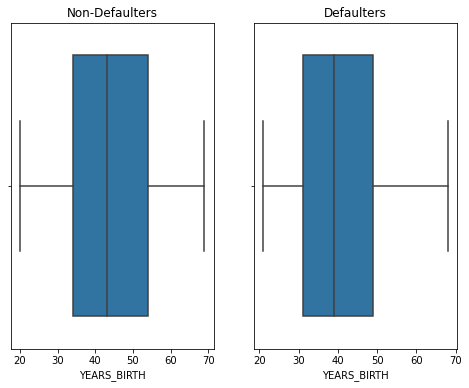

In [100]:
#univariate analysis for 'YEARS_BIRTH'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(target0['YEARS_BIRTH'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(target1['YEARS_BIRTH'])
plt.title('Defaulters')
plt.show()

From the above box plot we can note that Non-Defaulters are between 34 to 54 years and defaulters are between 31 to 48 years.

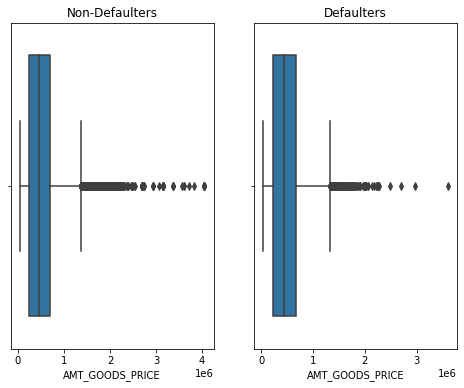

In [99]:
#Univariate analysis on 'AMT_GOODS_PRICE'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(target0['AMT_GOODS_PRICE'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(target1['AMT_GOODS_PRICE'])
plt.title('Defaulters')
plt.show()

From the above box plot we can note that both Non-Defaulters and Defaulters have a mid-point of 0.5.

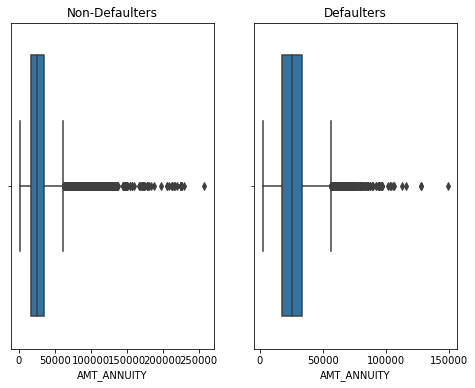

In [98]:
#Univariate Analysis on AMT_ANNUITY
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(target0['AMT_ANNUITY'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(target1['AMT_ANNUITY'])
plt.title('Defaulters')
plt.show()

### Bivariate Analysis

In [92]:
#Numerical and Numerical bivariate analysis

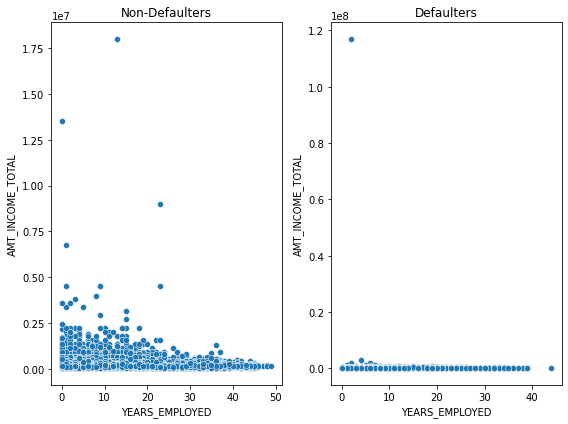

In [97]:
#analysis on 'Years_Employed','AMT_INCOME_TOTAL'
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target0[target0['YEARS_EMPLOYED']<1000],x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(data=target1[target1['YEARS_EMPLOYED']<1000],x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

There is no correlation between Years Employed and Total Income.

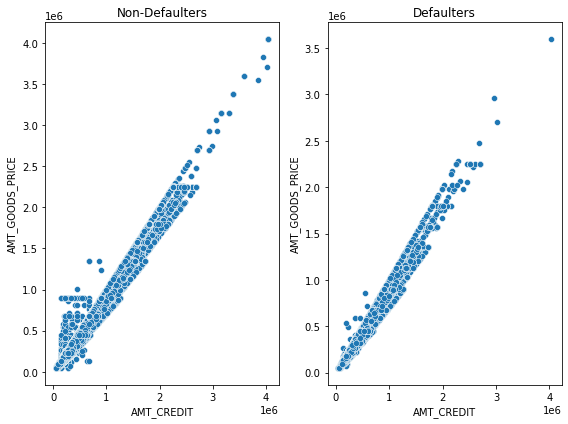

In [96]:
#bivariate analysis on AMT_CREDIT and AMT_GOODS_PRICE
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(data=target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

We can see there is a positive correlation between Goods Price and Credit Amount.

In [107]:
#Categorical and Categorical bivariate analysis

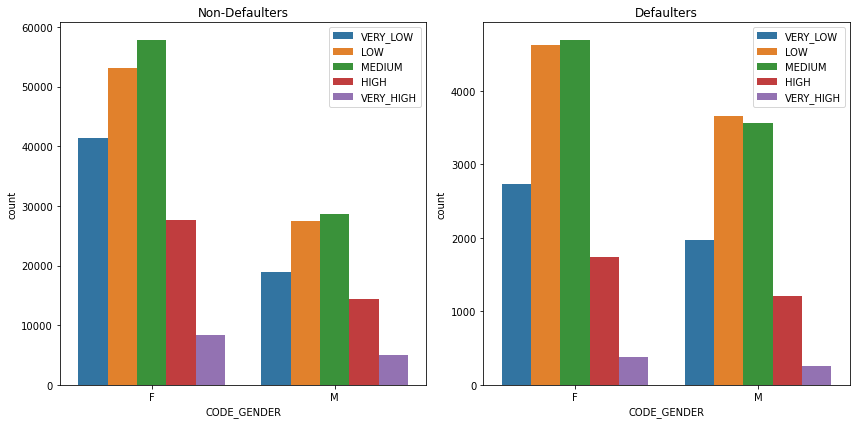

In [113]:
#bivariate analysis on CODE_GENDER and AMT_CREDIT_RANGE
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',hue='AMT_CREDIT_RANGE',data=target0)
plt.legend(loc='upper right')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',hue='AMT_CREDIT_RANGE',data=target1, order=['F','M'])
plt.title('Defaulters')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

We can see that Females take more loans and also have high credit amount in both the cases when compared to Males.

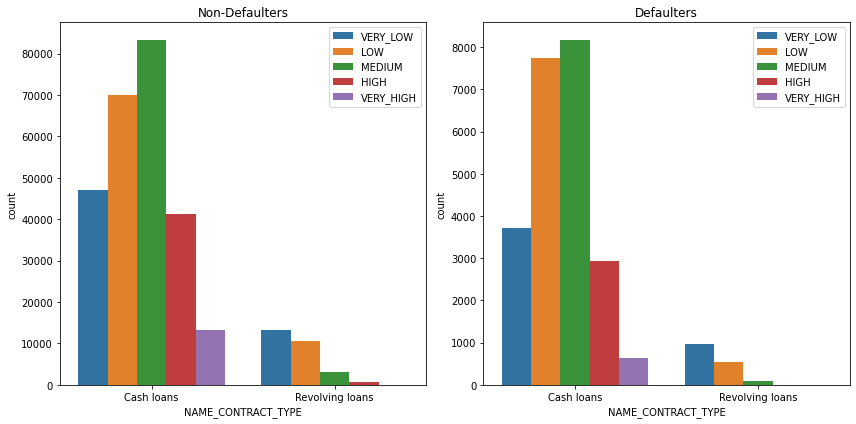

In [121]:
#bivariate analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=target0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=target1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Defaulters')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

We can see that clients prefer to take Cash loans in both the cases.

In [120]:
#numerical - categorical bivariate analysis

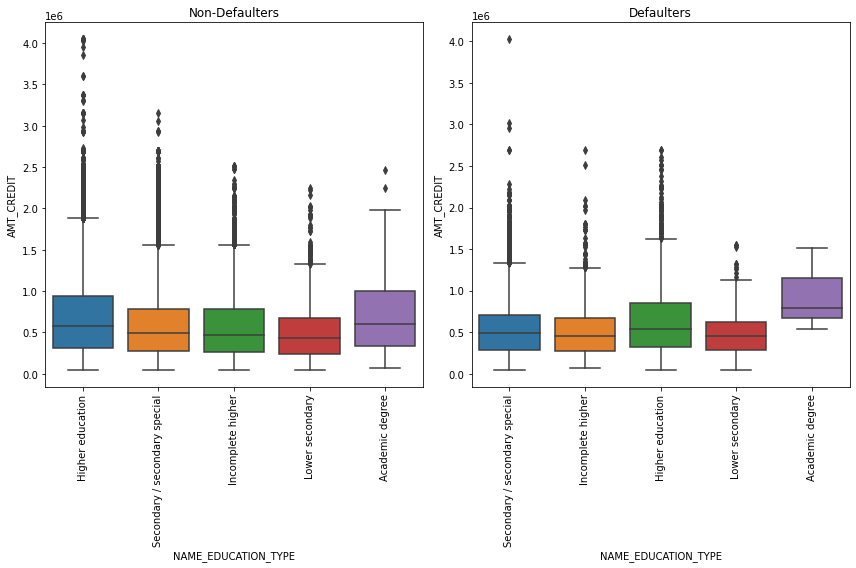

In [125]:
#bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE',data=target0)
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE',data=target1)
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.tight_layout()
plt.show()

We can see that clients with Academic degree are more likely to default the loan payment.

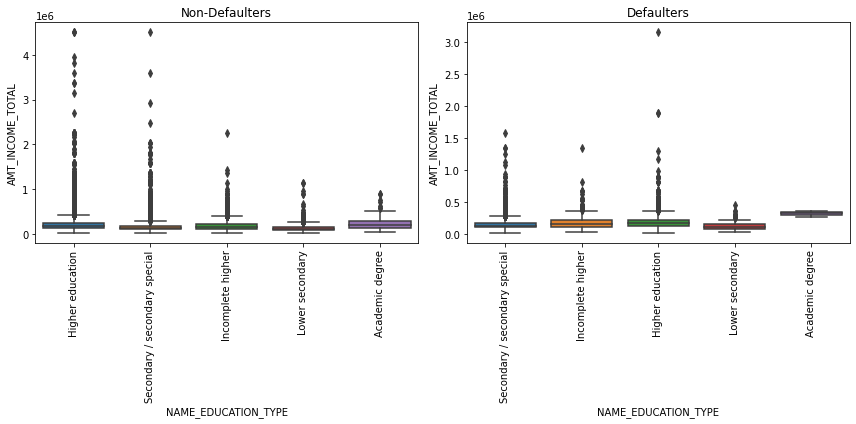

In [127]:
#bivariate analysis on AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=target0[target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.boxplot(data=target1[target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.tight_layout()
plt.show()

We can see that Non-Defaulters have more outliers compared to Defaulters.

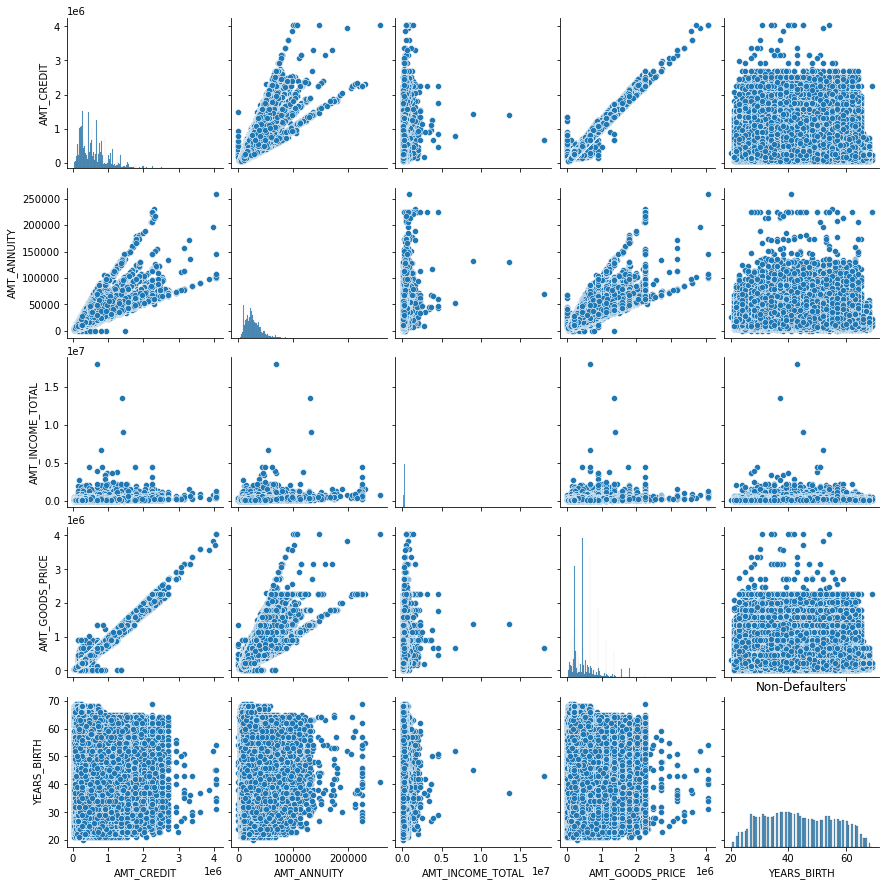

In [136]:
#Pairplot for Target 0 (Non-Defaulters)
pair = target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.title('Non-Defaulters')
plt.show()

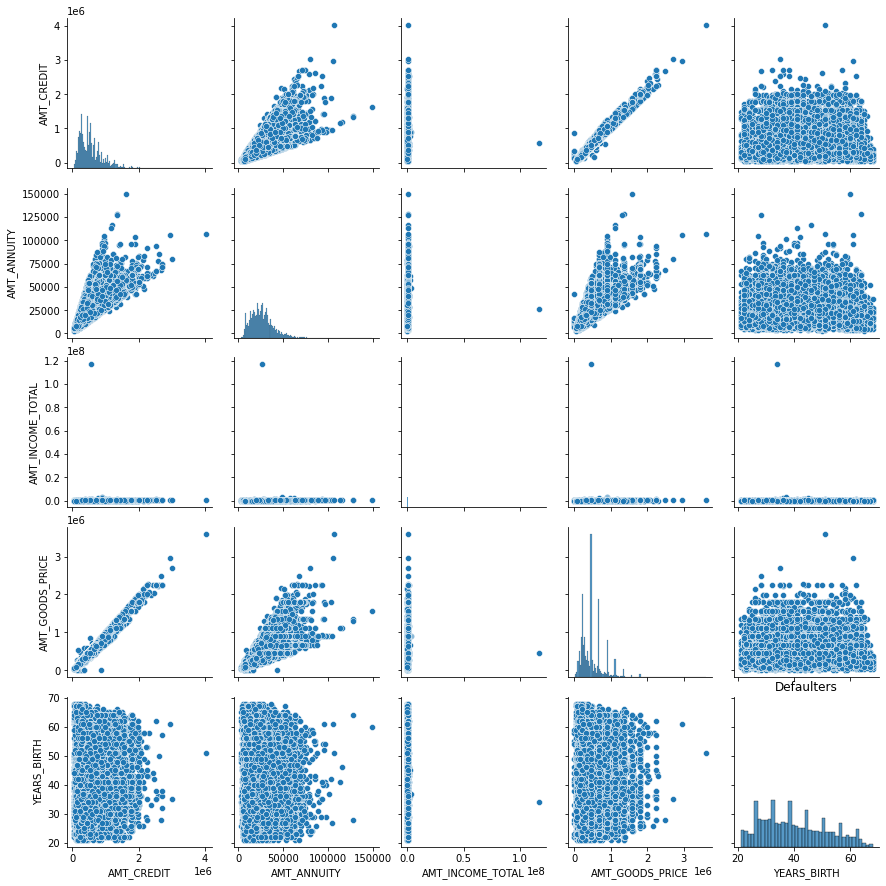

In [137]:
#Pairplot for Target 1 (Defaulters)
pair = target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.title('Defaulters')
plt.show()

### Merging Datasets

In [138]:
#reading the previous dataset
prev_df = pd.read_csv('previous_application.csv')

In [139]:
#Checking the data
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#Checking the shape
prev_df.shape

(1670214, 37)

In [142]:
#Checking the info
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [147]:
#describing the data
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [149]:
#merging the datasets on the common column
all_df = pd.merge(left=app_df,right=prev_df,how='inner',on='SK_ID_CURR')

In [150]:
#Checking the data
all_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEARS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9,5,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,MEDIUM,LOW,18+,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,35+,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,35+,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3,0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,35+,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,N

In [151]:
#Checking the shape
all_df.shape

(1413701, 111)

In [153]:
#Checking the info
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 111 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(3), float64(34), int32(4), int64(43), object(27)
memory usage: 1.1+ GB


In [154]:
#describing the data
all_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,4.421384e+01,1.985500e+02,1.321683e+01,7.823753e+00,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114275e-01,4.896986e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,1.190217e+01,3.926378e+02,9.725399e+00,4.129233e+00,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-01,1.864095e-01,2.611277e-01,4.156903e-01,3.791613e-01,1.911188e-01,1.965360e-01,2.53071

In [156]:
#checking the percentage of 'NAME_CONTRACT_STATUS'
all_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

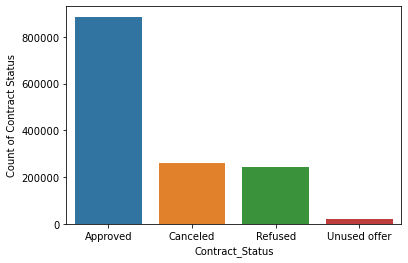

In [158]:
#ploting 'NAME_CONTRACT_STATUS'
sns.countplot(all_df['NAME_CONTRACT_STATUS'])
plt.xlabel('Contract_Status')
plt.ylabel('Count of Contract Status')
plt.show()

In [160]:
#diving the new dataframe into 4parts based on contract status
approved_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=all_df[all_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=all_df[all_df['NAME_CONTRACT_STATUS']=='Unused offer']

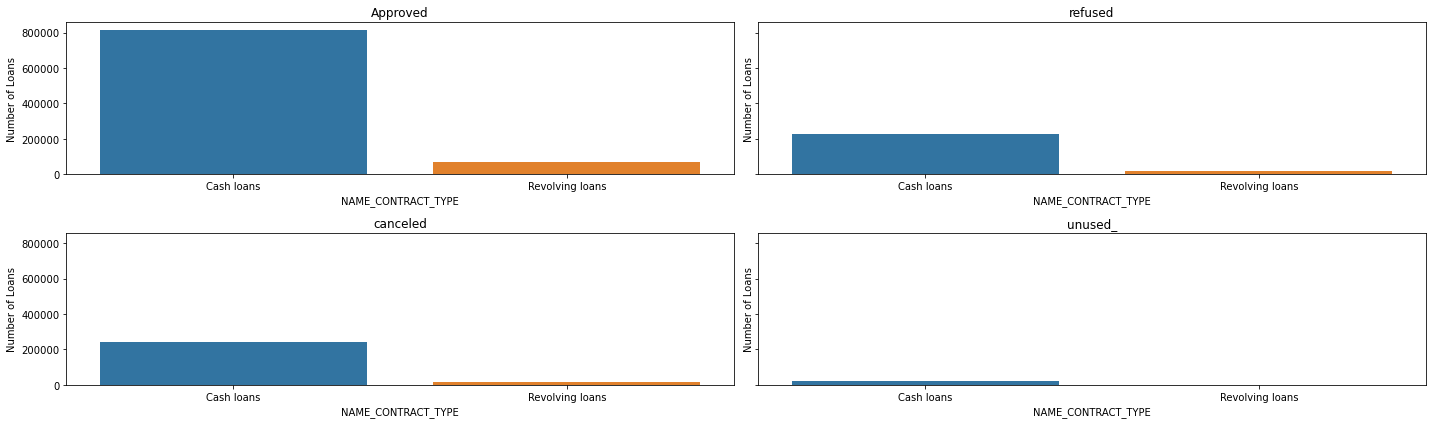

In [161]:
#Analysis on variable 'NAME_CONTRACT_TYPE' and 'Contract Status'
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_CONTRACT_TYPE_x')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CONTRACT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_CONTRACT_TYPE_x')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_CONTRACT_TYPE_x')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CONTRACT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_CONTRACT_TYPE_x')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CONTRACT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

We can see that there are more approvals for Cash loans.

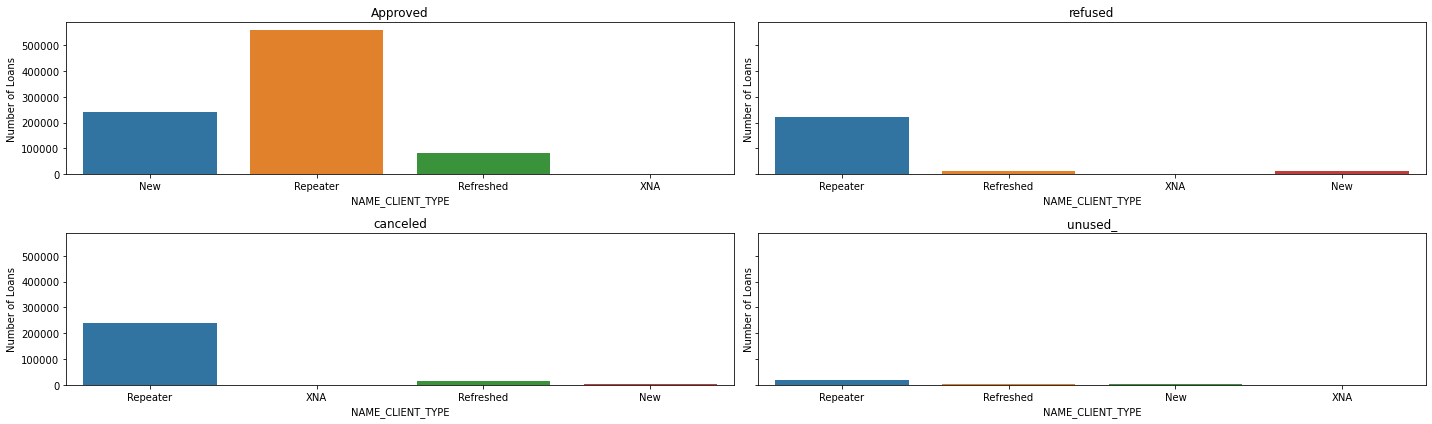

In [163]:
##Analysis on variable 'NAME_CLIENT_TYPE' and 'Contract Status'

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_CLIENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_CLIENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_CLIENT_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CLIENT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

We can see that Repeater gets the most approvals.

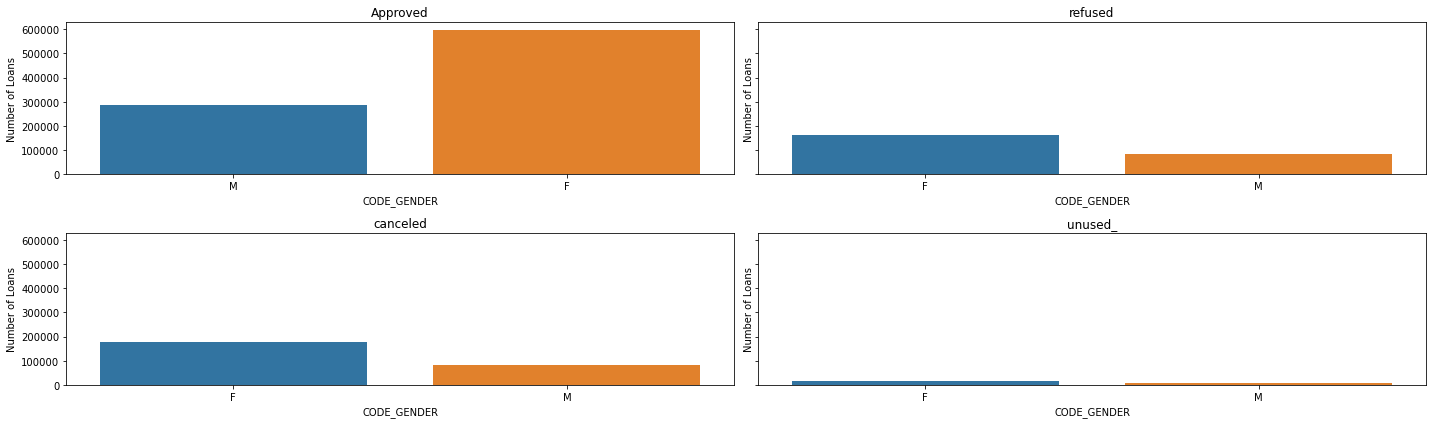

In [164]:
##Analysis on variable 'CODE_GENDER' 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='CODE_GENDER')
ax1.set_title('Approved')
ax1.set_xlabel('CODE_GENDER')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='CODE_GENDER')
ax2.set_title('refused')
ax2.set_xlabel('CODE_GENDER')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='CODE_GENDER')
ax3.set_title('canceled')
ax3.set_xlabel('CODE_GENDER')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='CODE_GENDER')
ax4.set_title('unused_')
ax4.set_xlabel('CODE_GENDER')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

We can see that here also Females gets the most approvals.

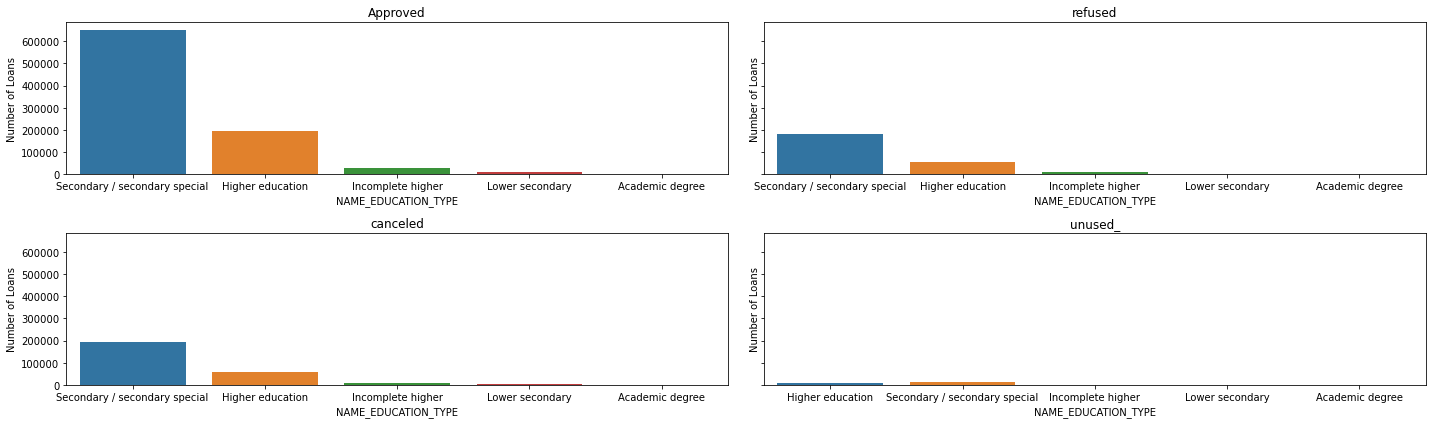

In [165]:
##Analysis on variable 'NAME_EDUCATION_TYPE' 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_EDUCATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_EDUCATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_EDUCATION_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_EDUCATION_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_EDUCATION_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_EDUCATION_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_EDUCATION_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

In this also Secondary gets the most approvals.

### Multivariate Analysis

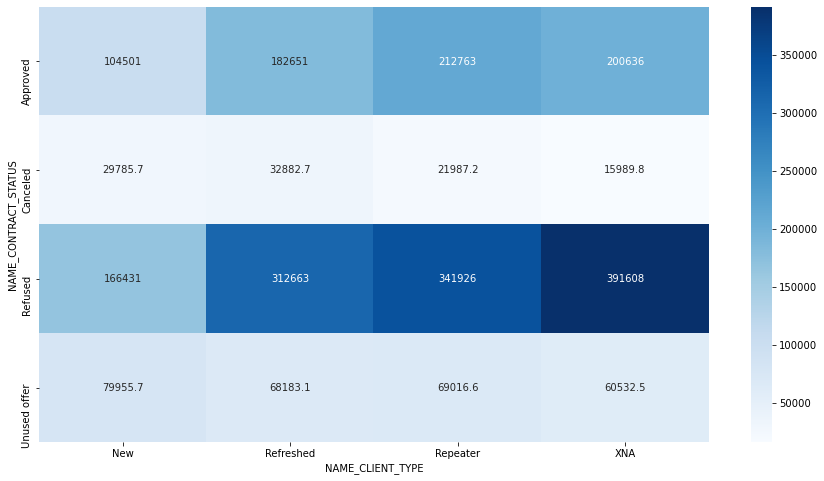

In [166]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

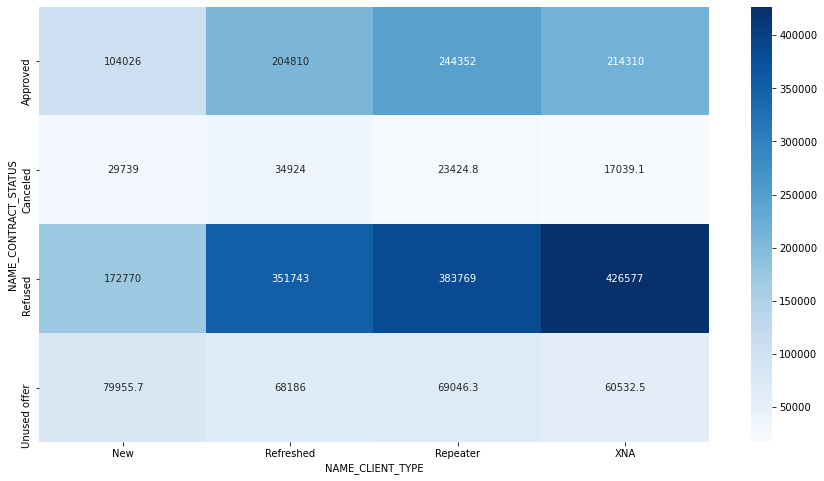

In [168]:
# Checking contract status vs name client type aggregating over AMT CREDIT

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

### Conclusion

- Banks should focus more on education type 'Higher education' and avoid Secondary/secondary special, incomplete higher or lower secondary as they face paying difficulties. 
- Avoid income type of 'Working' clients as they have high percentage of paying difficulties. Instead focus on Commercial associate, pensioner and State servant. 
- Focus on clients from housing type ‘House/apartment’ as they are having less paying difficulties.
- Banks should focus on the client from age group of 41 to 70 as they will be financial stable and shows less paying difficulties.

